# Click Through Rate Optimization for Online Ads

Online advertising these days can generate loads of revenue and the company's website has no idea which ad the customers would love the most or click the most.

So a company has 2 options - 

1. Run an old fashioned AB Test and expore the various ads and then find out which ad is the best and then exploit it later

2. Use Reinforcement Learning Strategy so it can exploit and explore at the same time thus saving costs



My aim in this project is to demonstrate the use of various Reinforcement Learning Strategies which help in generating more revenue and reduce the time and cost spent in exploration.

I have taken up the following problem for my Artificial Intelligence Project under DelhiBabu Sir -


### The problem is that a bike company is about to launch a brand new bike in a month. To market it properly the Marketing and Publicty team came up with 10 different advertisments for the bike....in different scenarios like near a bridge or forest or a stadium, etc.


Now the basic approach to solving Reinforcement Learning Problems is to use Multi Armed Bandit approach.

Here we consider different ads as different arms of a the bandits in a casino.


#### Now every BANDIT(ad) has a hidden distribution. If we somehow know that before hand we can exploit the best ad or BANDIT and generate maximum revenue.

<img src="04Ggq.jpg">

Now the x axis represents   ->  Probabability of success (between 0 and 1)(also represented later as v)

and the y axis represents  ->   Number of outcomes (also represented later as k)


From the figure it is clear that the leftmost curve is the best distribution because it is most left skewed.

In [1]:
# Random Selection

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Results of selecting any ad at random


Before implementing any strategy let us see what happens if we select ads at random  - No STRATEGY

In [3]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward_random = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward_random = total_reward_random + reward
print(total_reward_random)

1219


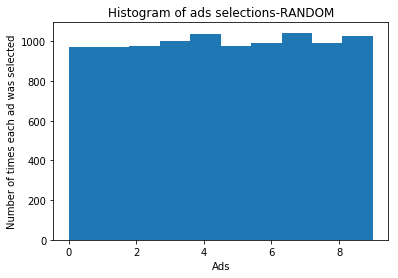

In [4]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections-RANDOM')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
plt.close("all")

# Applying Thompson Sampling for selecting the ads

In [5]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward_ths = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward_ths = total_reward_ths + reward
print(total_reward_ths)

2606


In [6]:
print(ads_selected)

[3, 6, 2, 8, 9, 0, 0, 1, 5, 9, 0, 4, 1, 3, 7, 7, 7, 7, 8, 3, 7, 6, 7, 6, 5, 7, 1, 7, 1, 1, 3, 1, 7, 0, 5, 2, 1, 4, 2, 7, 5, 7, 1, 0, 5, 6, 9, 7, 7, 7, 0, 7, 8, 3, 2, 4, 0, 7, 8, 9, 7, 1, 5, 2, 7, 9, 7, 0, 7, 0, 0, 9, 2, 7, 9, 7, 9, 7, 5, 0, 0, 4, 8, 7, 0, 3, 5, 7, 2, 0, 7, 4, 1, 7, 2, 6, 2, 7, 7, 7, 5, 3, 2, 1, 7, 1, 1, 1, 4, 7, 4, 4, 7, 4, 6, 4, 1, 7, 7, 7, 7, 8, 7, 2, 1, 7, 4, 7, 7, 5, 1, 8, 5, 6, 9, 7, 4, 6, 2, 5, 0, 6, 7, 7, 6, 6, 2, 2, 3, 5, 1, 4, 7, 7, 7, 6, 9, 7, 8, 7, 5, 6, 0, 4, 4, 0, 4, 1, 1, 4, 9, 7, 6, 3, 1, 8, 7, 7, 2, 1, 6, 2, 0, 0, 7, 7, 3, 7, 4, 7, 7, 4, 2, 7, 1, 1, 0, 0, 7, 0, 2, 4, 7, 4, 4, 8, 7, 7, 8, 4, 7, 4, 7, 8, 3, 1, 4, 4, 0, 7, 5, 7, 4, 7, 4, 0, 2, 7, 4, 7, 5, 7, 2, 7, 7, 7, 8, 4, 7, 7, 7, 4, 7, 1, 7, 5, 8, 1, 7, 7, 0, 7, 8, 7, 7, 7, 7, 2, 7, 7, 7, 0, 7, 7, 7, 7, 7, 4, 4, 7, 2, 7, 4, 7, 7, 7, 6, 8, 6, 7, 7, 8, 7, 7, 7, 1, 4, 7, 7, 7, 6, 8, 7, 5, 4, 7, 8, 2, 4, 7, 5, 7, 7, 7, 6, 5, 1, 4, 7, 1, 4, 6, 6, 5, 7, 6, 0, 7, 6, 3, 7, 6, 7, 7, 4, 0, 5, 9, 2, 7, 0, 8, 6, 

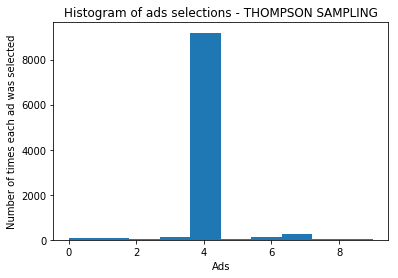

In [7]:
# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections - THOMPSON SAMPLING')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
plt.close("all")

# Applying Upper Confidence Bound for ad selection

1249


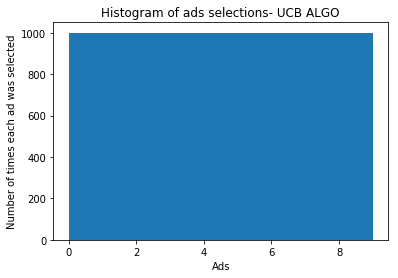

In [8]:
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

# Visualising the results
print(total_reward)
plt.hist(ads_selected)
plt.title('Histogram of ads selections- UCB ALGO')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [9]:
total_rewards_ucb = 2178

Text(0.5,1,'Different Algorithms for CTR Optimization')

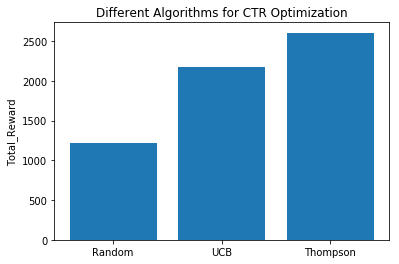

In [10]:
algorithms = ['Random','UCB','Thompson']
totrew = [total_reward_random,total_rewards_ucb,total_reward_ths]
plt.bar(algorithms,totrew,align='center', alpha=1)
plt.ylabel('Total_Reward')
plt.title('Different Algorithms for CTR Optimization')

# Epsilon-Greedy Method for ad selection



In [11]:
class Bandit:
    def __init__(self):
        self.arm_values = np.random.normal(0,1,10)
        self.K = np.zeros(10)
        self.est_values = np.zeros(10)
        
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        reward = self.arm_values[action] + noise
        return reward
    
    def choose_eps_greedy(self,epsilon):
        rand_num = np.random.random()
        if epsilon>rand_num:
            return np.random.randint(10)
        else:
            return np.argmax(self.est_values)
    
    def update_est(self,action,reward):
        self.K[action] += 1
        alpha = 1./self.K[action]
        self.est_values[action] += alpha * (reward - self.est_values[action])

In [12]:
def experiment(bandit,Npulls,epsilon):
    history = []
    for i in range(Npulls):
        action = bandit.choose_eps_greedy(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        history.append(R)
    return np.array(history)

In [13]:
Nexp = 500
Npulls = 3000

avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p01 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)

for i in range(Nexp):
    bandit = Bandit()
    avg_outcome_eps0p0 += experiment(bandit,Npulls,0.0)
    bandit = Bandit()
    avg_outcome_eps0p01 += experiment(bandit,Npulls,0.01)
    bandit = Bandit()
    avg_outcome_eps0p1 += experiment(bandit,Npulls,0.1)

avg_outcome_eps0p0 /= np.float(Nexp)
avg_outcome_eps0p01 /= np.float(Nexp)
avg_outcome_eps0p1 /= np.float(Nexp)

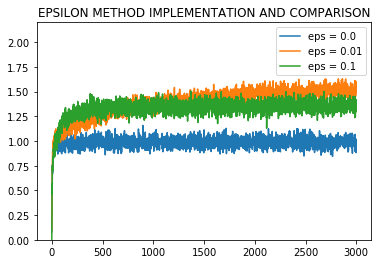

In [14]:
plt.title("EPSILON METHOD IMPLEMENTATION AND COMPARISON")
plt.plot(avg_outcome_eps0p0,label="eps = 0.0")
plt.plot(avg_outcome_eps0p01,label="eps = 0.01")
plt.plot(avg_outcome_eps0p1,label="eps = 0.1")
plt.ylim(0,2.2)
plt.legend()
plt.show()

# Live tweet streaming and reinforcement learning

In [2]:
import scipy.stats as ss
from IPython import display
import tweepy

import sys

In [3]:
consumer_key = "2jnVmAW8Pm9mqIdvp9iud1KCQ"
consumer_secret = "l1cKgJBnCmrfOqmSuTWqwU9C3jLgx0HBAdZgc8VaUXtgOFG4I4"
access_token = "741526837197713408-YTOGHK7VsJTAZdQYBu4mdMtSKYlG158"
access_token_secret = "V5BJMGl8vBIeXuTahu7ZJKCguZcvo0QFRfPoVwud676f9"
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [17]:
tr1=0
class BanditEpsGreedy(object):
    """
    Use Epsilon-Greedy Method
    """
    def __init__(self,keys,init,epsilon=0.1):
        self.epsilon = epsilon
        self.ActionValue = {}
        for key in keys:
            self.ActionValue[key] = init

    def get_reward(self,action,text):
        if any(x in text for x in action):
            global tr1
            tr1 = tr1+1
            return 1
        else:
            return 0

    def choose_action(self):
        """
        For 1-epsilon of the time, choose the action with the highest estimated value.
        For epsilon of the time, randomly choose an action
        """
        random_num = np.random.rand()
        if random_num<self.epsilon:
            return random.choice(self.ActionValue.keys())
        else:
            return max(self.ActionValue, key=lambda x:self.ActionValue.get(x)[1])
    
    def update(self,action,reward):
        """
        Update estimated value by keeping running average of rewards for each action
        """
        K = self.ActionValue[action][0]
        Value = self.ActionValue[action][1]
        K += 1
        alpha = 1./K
        Value += alpha * (reward - Value)
        self.ActionValue[action] = (K,Value)
        
    def plotme(self):
        """
        Display results
        """
        display.clear_output(wait=True)

        a1=[]
        b1=[]

        plt.xlim(0,0.6)
        for key in self.ActionValue:
            print(str.format('action: {0}, Value: {1:.2f}, K: {2}', key,self.ActionValue[key][1],self.ActionValue[key][0]))
            a1.append(self.ActionValue[key][1])
            b1.append(self.ActionValue[key][0])
            
        plt.plot(a1,b1,label=key) 


In [4]:
tr=0
class BanditRPM(object):
    def __init__(self,keys,init):
        self.ActionValue = {}
        for key in keys:
            self.ActionValue[key] = init

    def get_reward(self,action,text):
        if any(x in text for x in action):
            global tr
            tr = tr+1
            return 1
        else:
            return 0
    
    def choose_action(self):
        """
        Use Thompson sampling to choose action. Sample from each posterior and choose the max of the samples.
        """
        samples = {}
        for key in self.ActionValue:
            samples[key] = np.random.beta(self.ActionValue[key][0], self.ActionValue[key][1])
        return max(samples, key=samples.get)

    def update(self,action,reward):
        """
        Update parameters of posteriors, which are Beta distributions
        """
        a, b = self.ActionValue[action]
        self.ActionValue[action] = (a+reward, b + 1 - reward)
        
    def plotme(self):
        """
        Display results
        """
        f = plt.figure()
        f.canvas.draw()
        plt.xlim(0,0.6)
        x = np.linspace(0,.6,100)
        for key in self.ActionValue:
            
            print(str.format('action: {0}, Value: {1:.2f}, K: {2}', key,self.ActionValue[key][1],self.ActionValue[key][0]))
            
            a = self.ActionValue[key][0]
            b = self.ActionValue[key][1]
            y = ss.beta.pdf(x, a,b)
    
            plt.scatter(x,y,label=key)
        #print(tr)
        plt.ylim(0,30)
        plt.legend()
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [5]:
class StreamWatcherHandler(tweepy.StreamListener):
    """ Handles all incoming tweets as discrete tweet objects.
    """
    
    def __init__(self,bandit):
        super(StreamWatcherHandler, self).__init__()
        self.bandit = bandit
 
    def on_status(self, status):
        """Called when status (tweet) object received.
        """
        action = self.bandit.choose_action()
        reward = self.bandit.get_reward(action,status.text.strip().lower())
        self.bandit.update(action,reward)
        self.bandit.plotme()
        return True
    
    def on_error(self, status):
        print (status)

## Epsilon Greedy on Live Tweets

action: ('donald', 'trump'), Value: 0.30, K: 345
action: ('hillary', 'clinton'), Value: 0.00, K: 9
action: ('bernie', 'sanders'), Value: 0.00, K: 11


SystemExit: 0

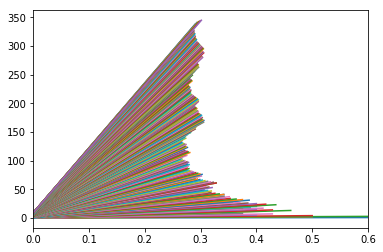

In [22]:
bandit = BanditEpsGreedy([('hillary','clinton'),('donald','trump'),('bernie','sanders')],(0,0.))
swh = StreamWatcherHandler(bandit)
stream = tweepy.Stream(auth, swh)
try:
    stream.filter(track=['election', 'president'])
except KeyboardInterrupt:
    sys.exit(0)

In [79]:
print(tr1)

11


## RandomProbablistic Matching on Live Twitter Stream

SystemExit: 0

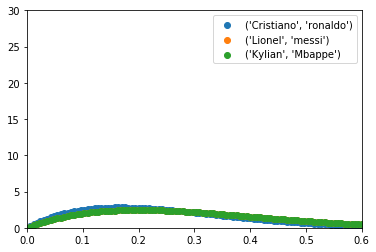

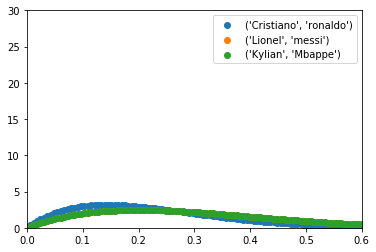

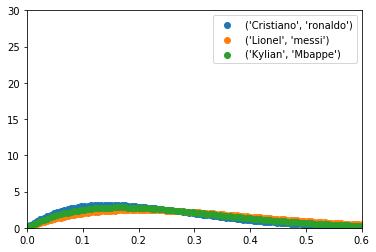

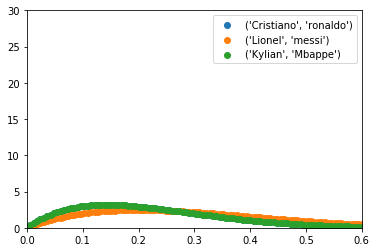

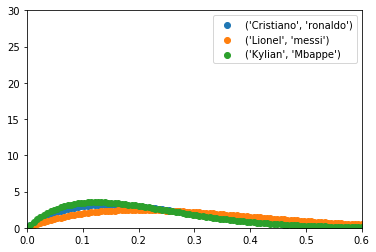

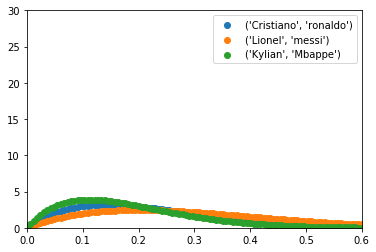

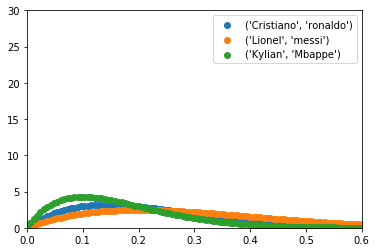

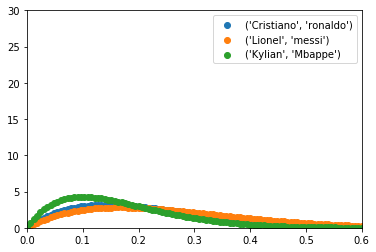

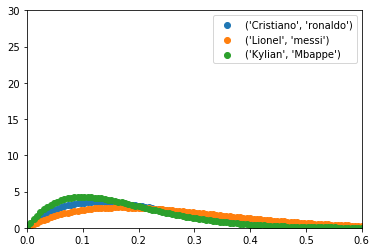

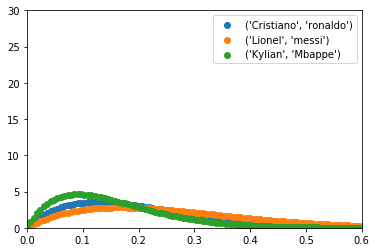

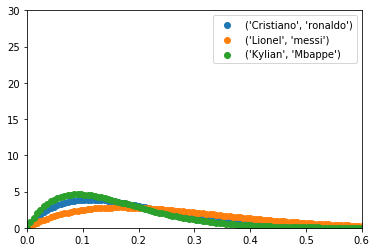

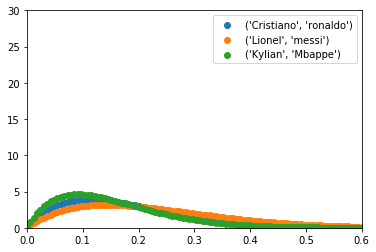

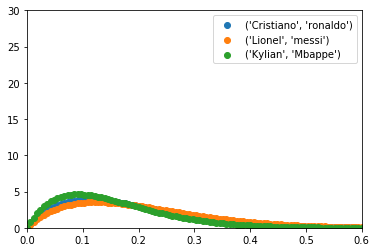

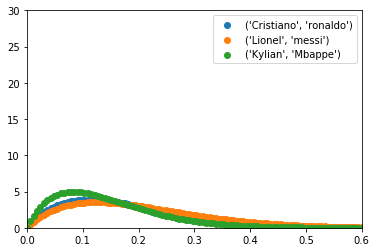

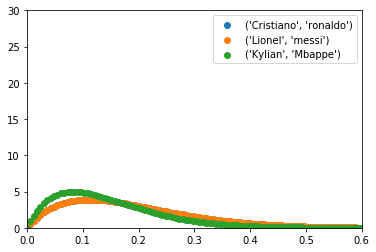

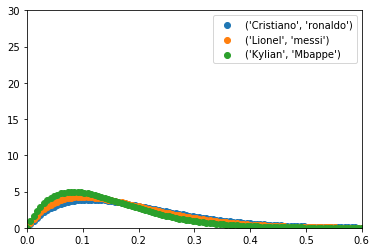

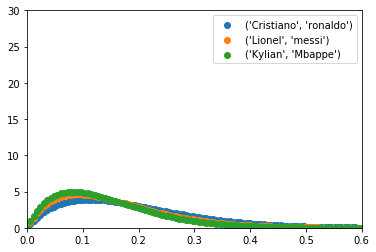

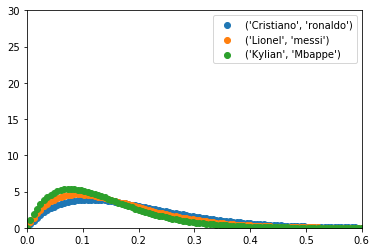

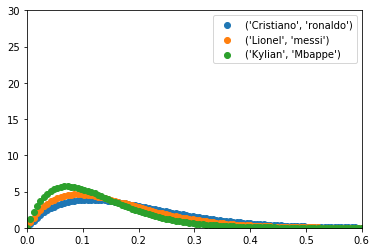

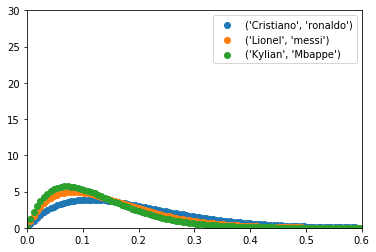

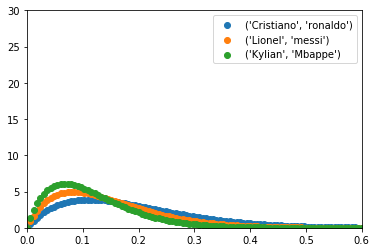

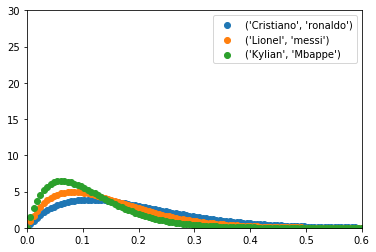

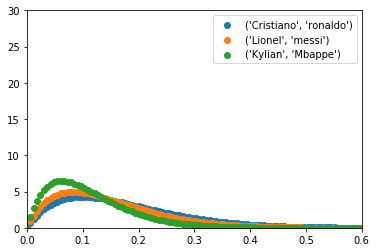

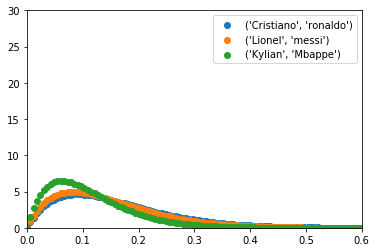

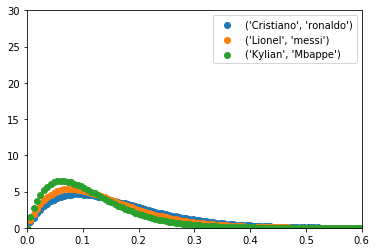

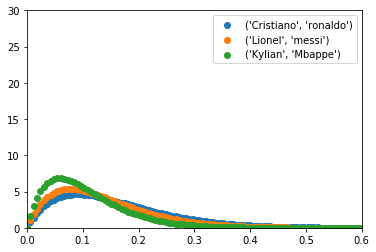

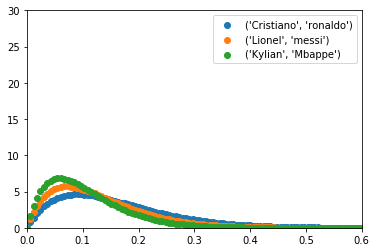

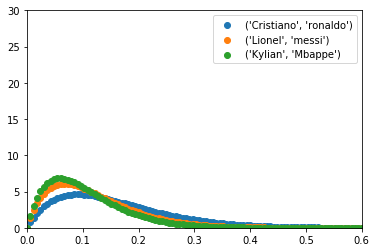

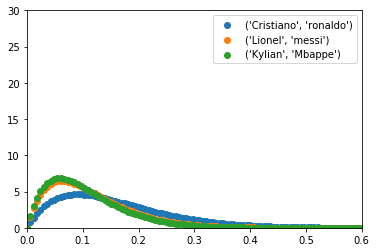

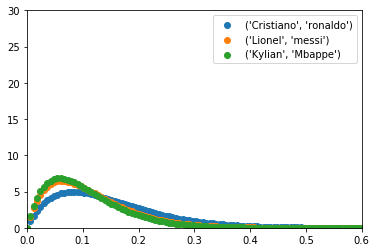

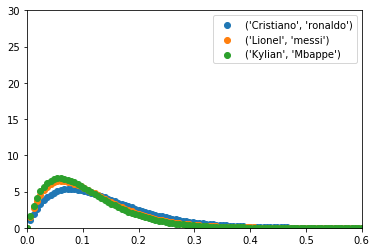

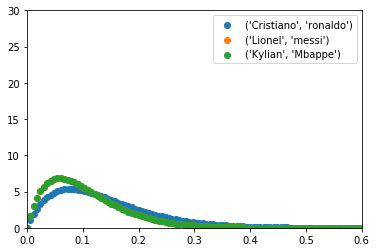

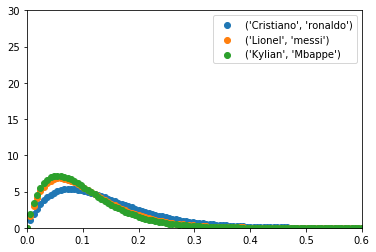

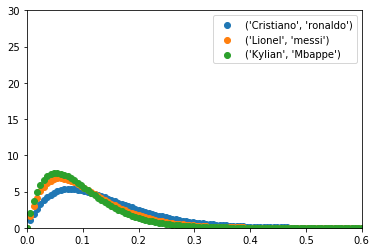

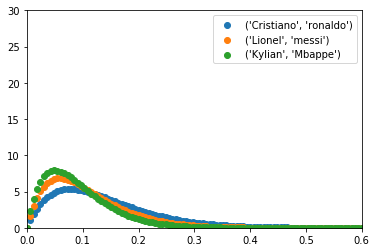

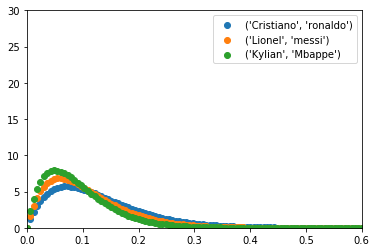

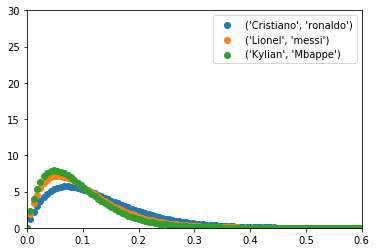

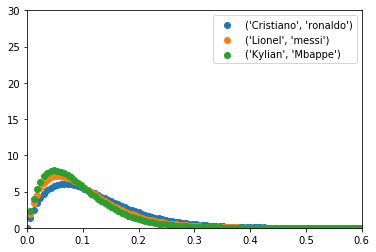

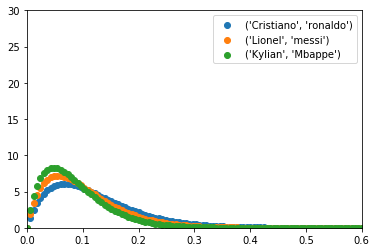

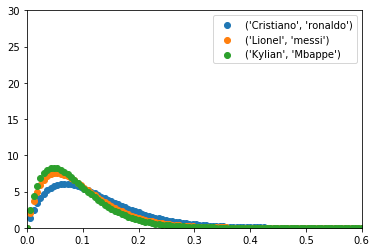

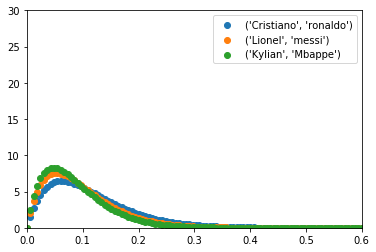

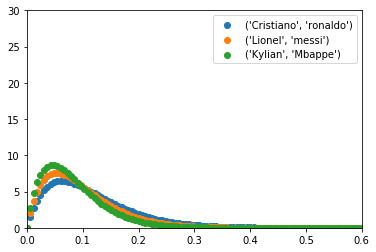

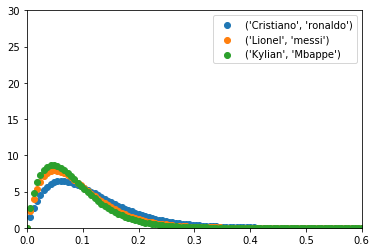

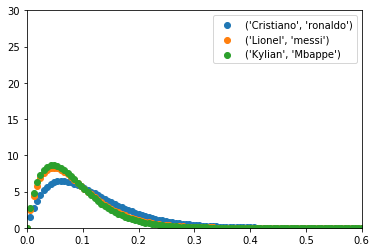

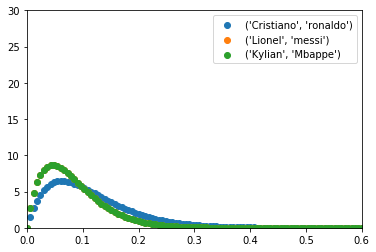

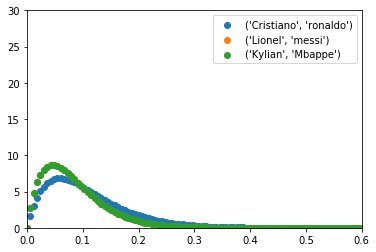

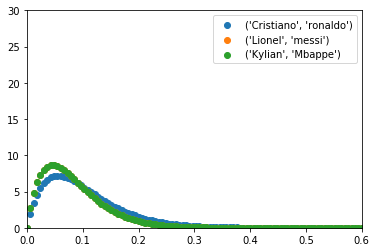

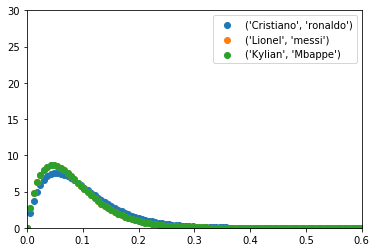

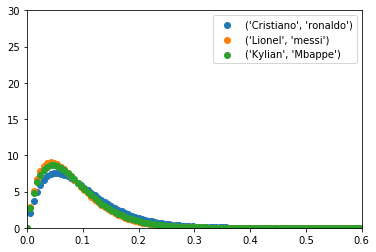

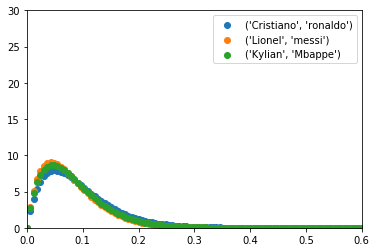

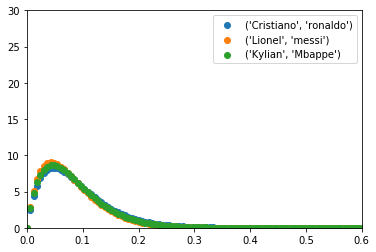

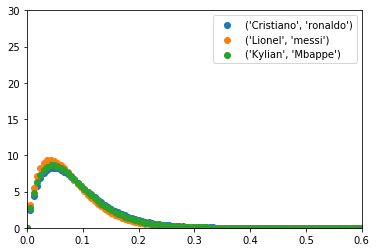

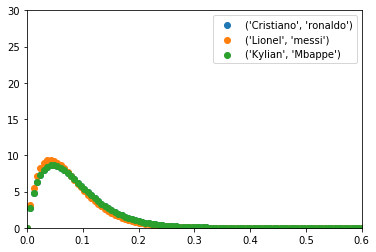

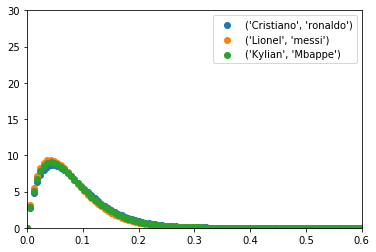

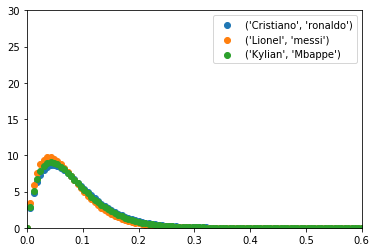

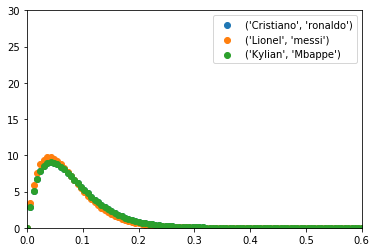

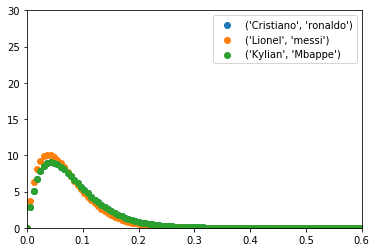

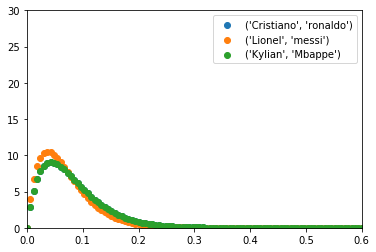

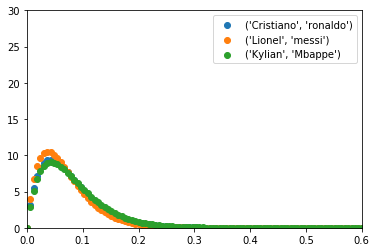

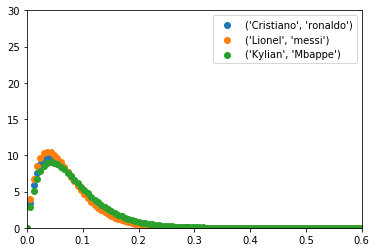

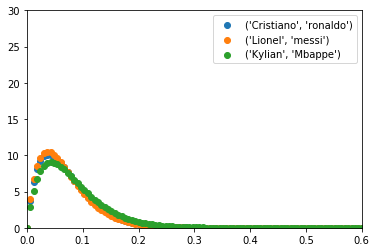

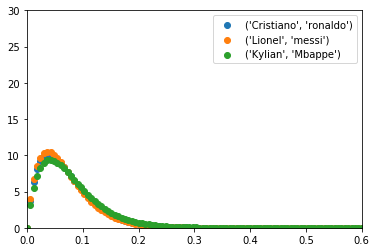

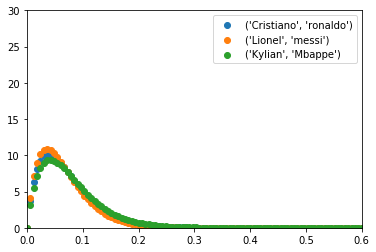

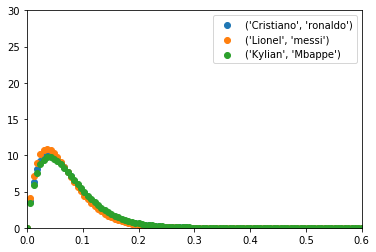

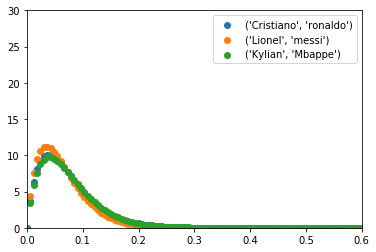

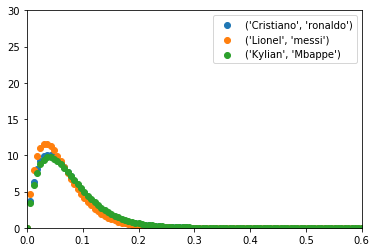

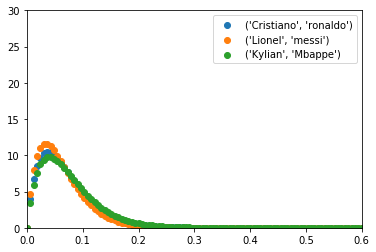

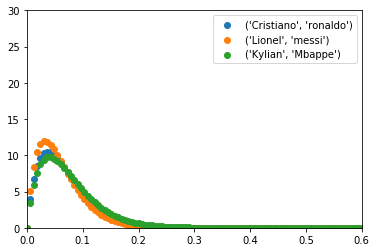

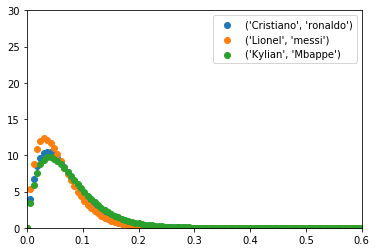

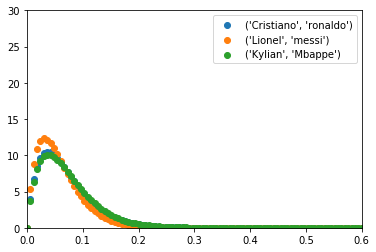

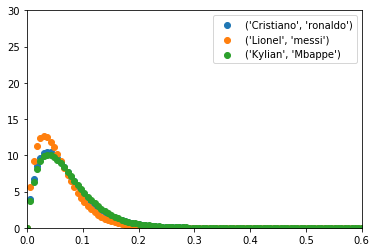

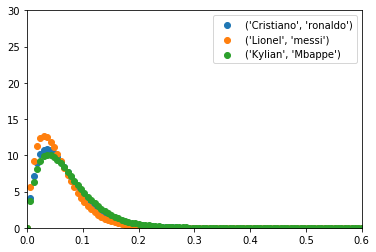

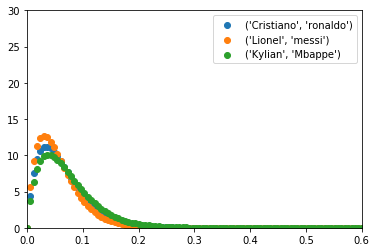

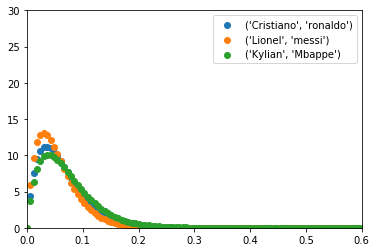

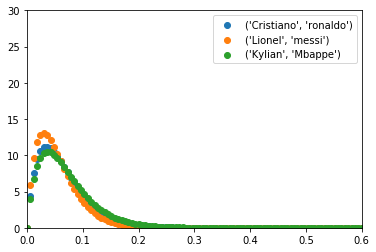

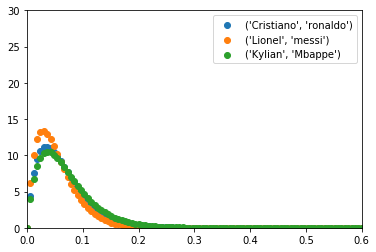

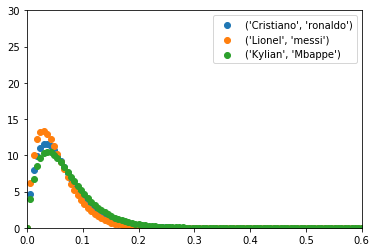

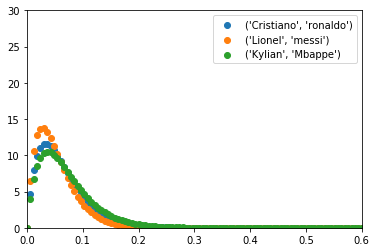

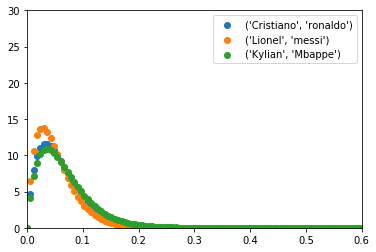

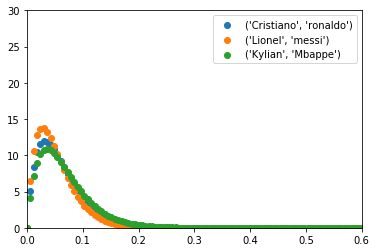

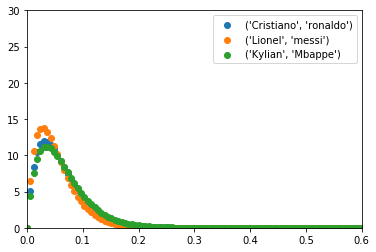

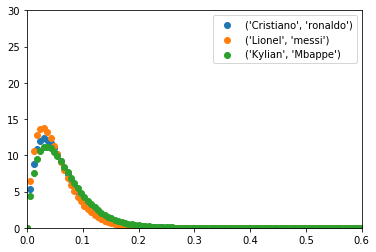

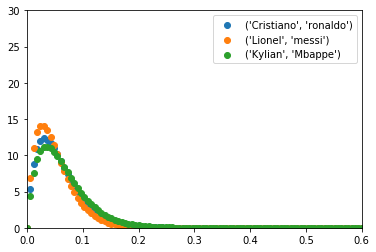

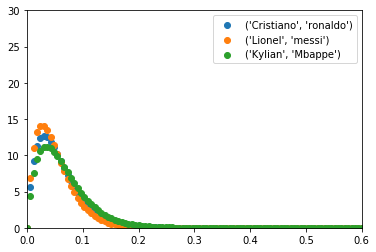

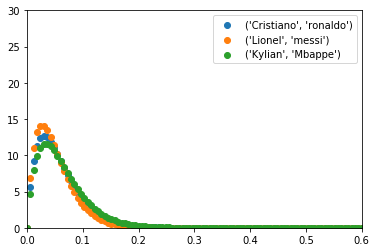

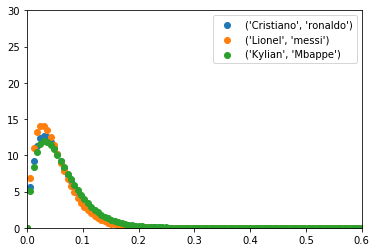

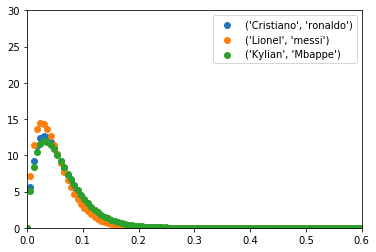

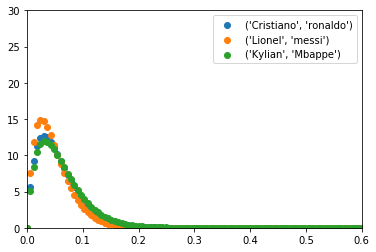

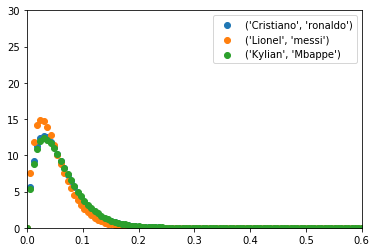

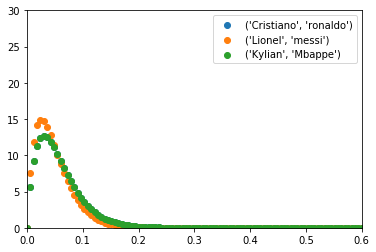

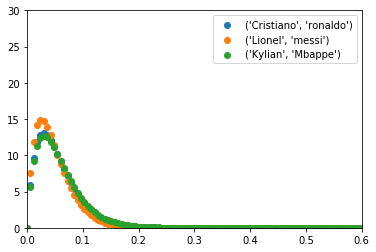

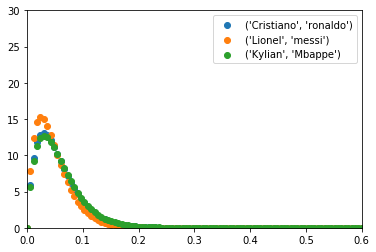

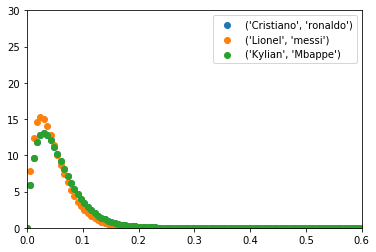

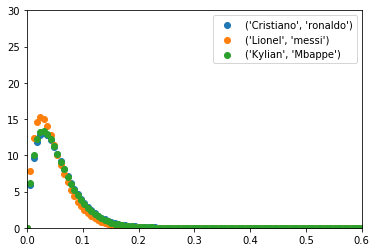

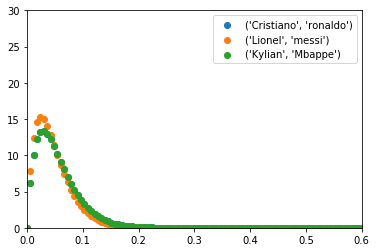

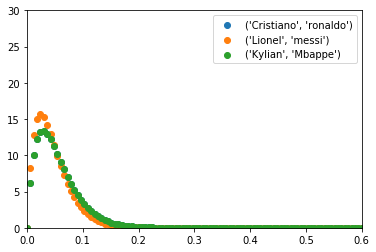

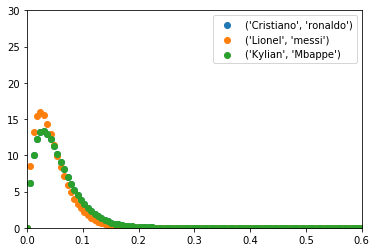

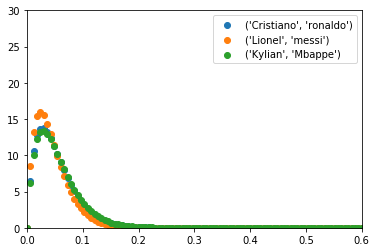

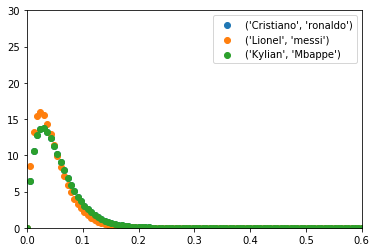

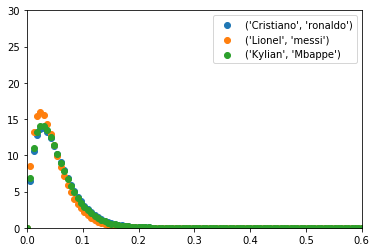

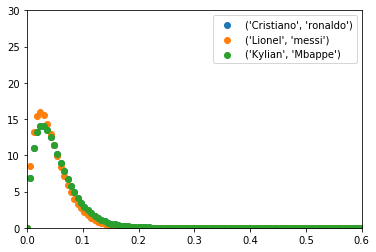

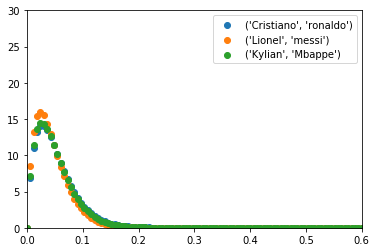

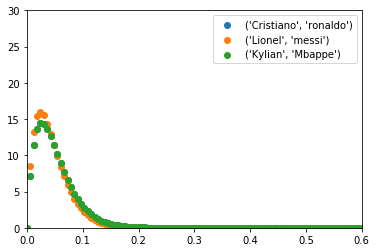

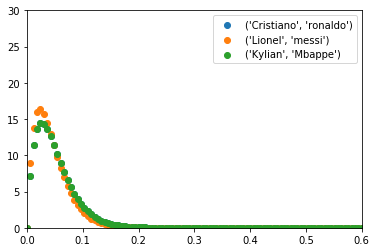

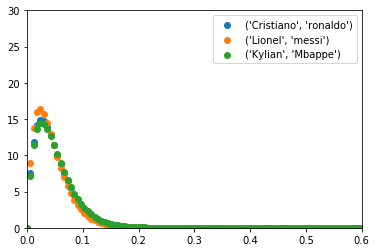

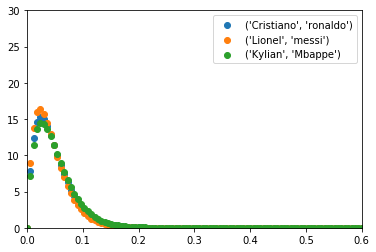

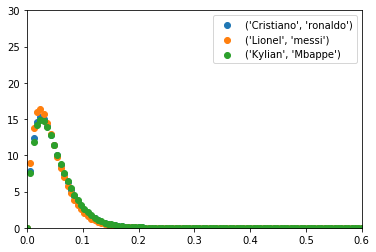

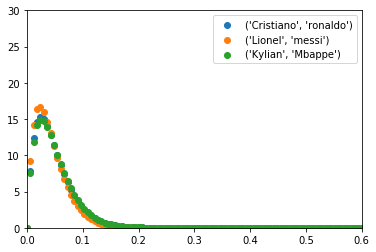

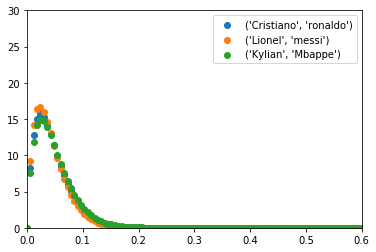

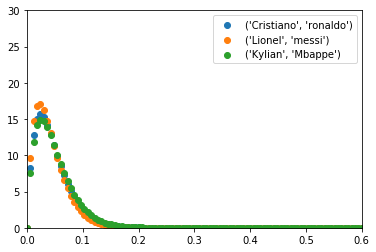

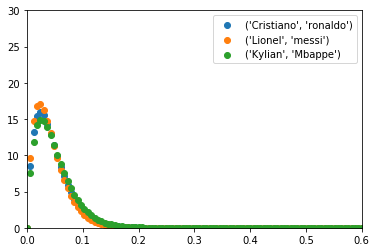

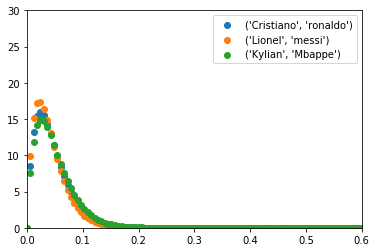

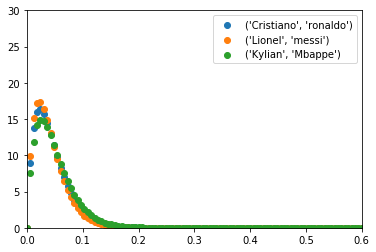

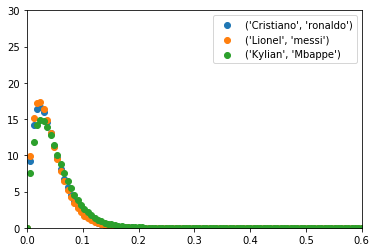

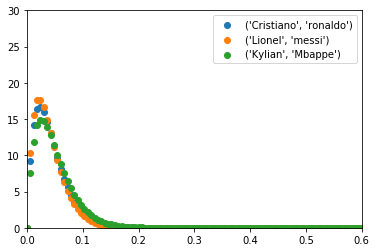

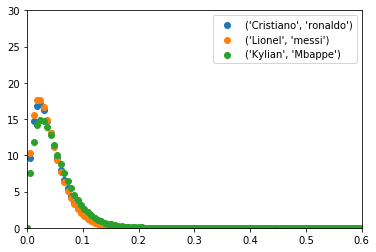

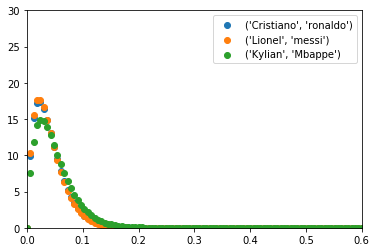

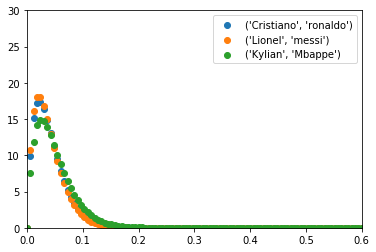

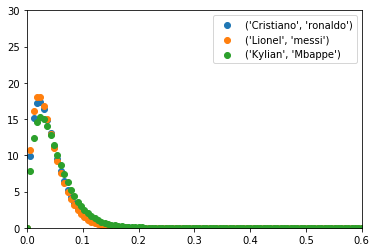

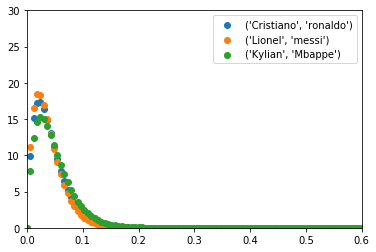

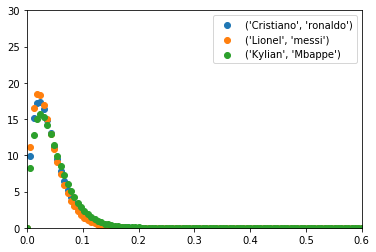

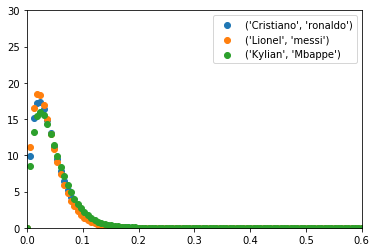

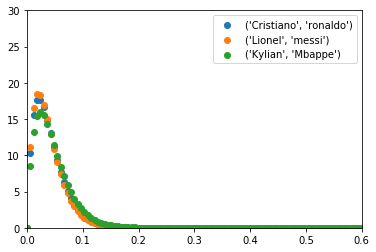

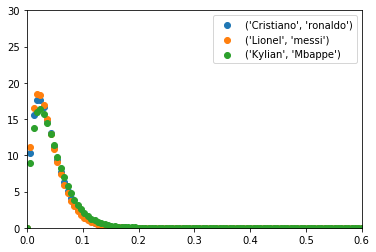

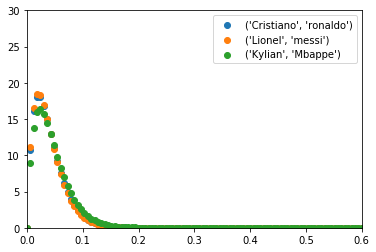

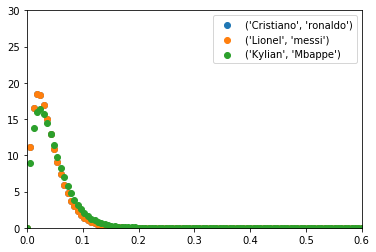

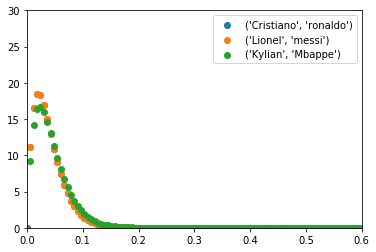

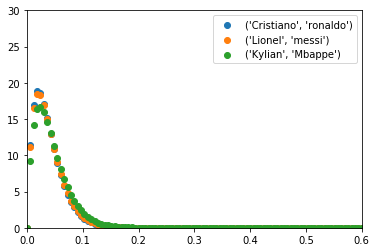

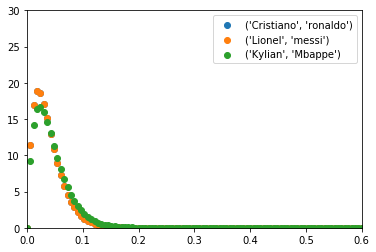

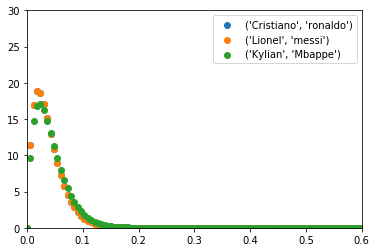

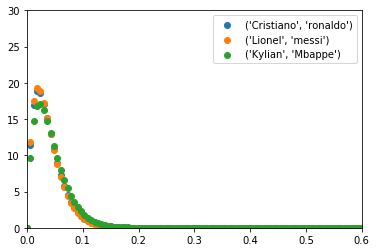

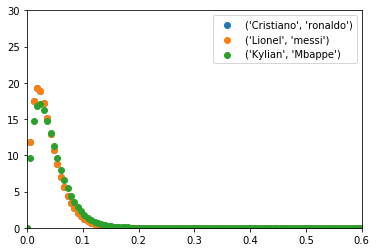

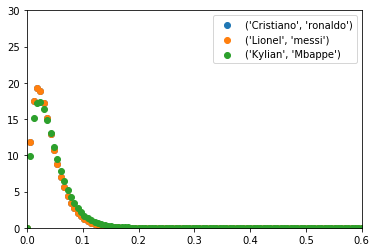

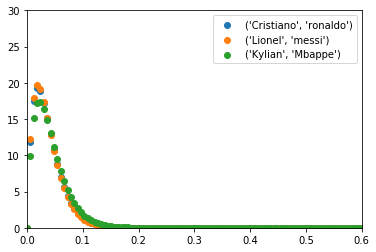

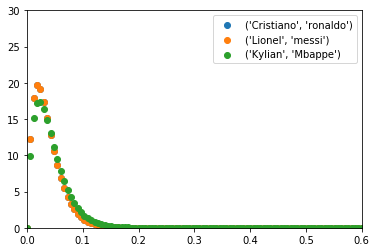

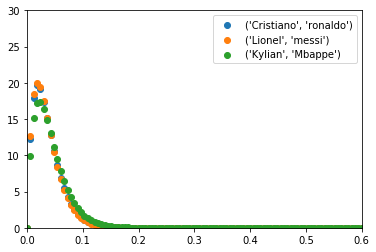

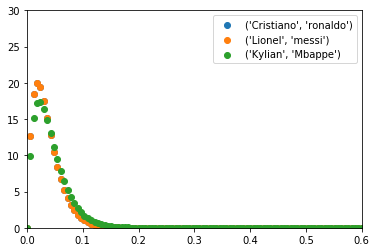

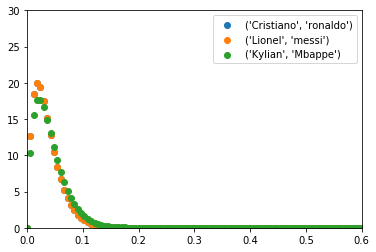

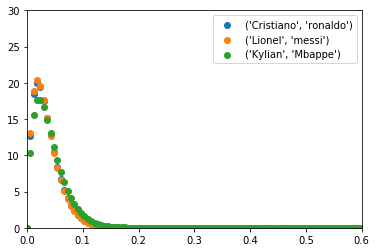

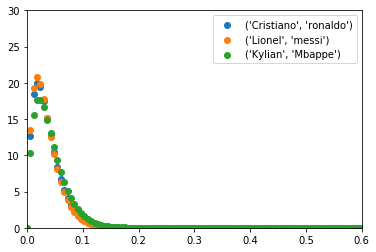

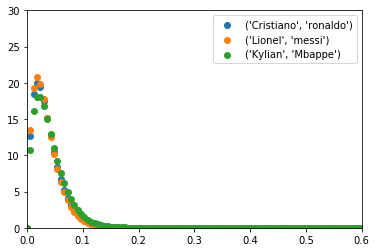

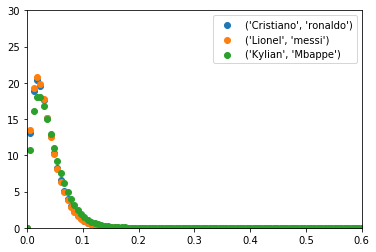

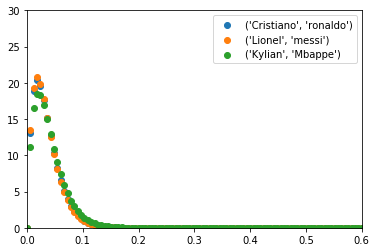

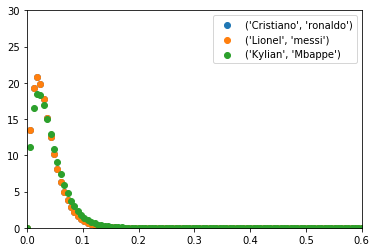

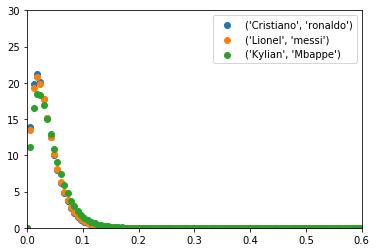

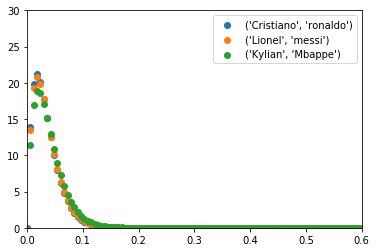

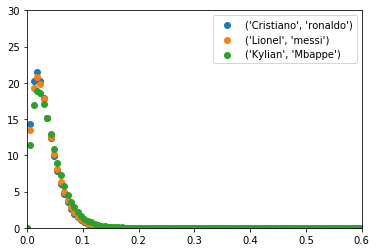

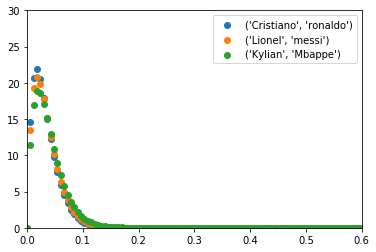

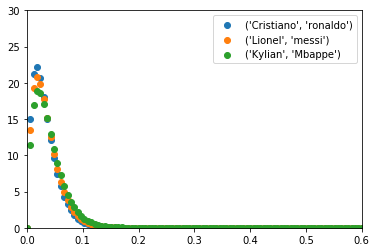

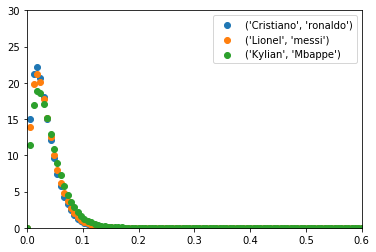

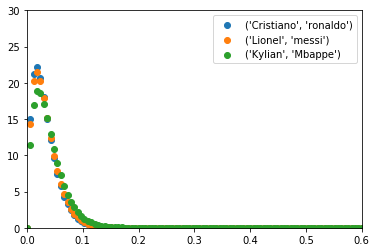

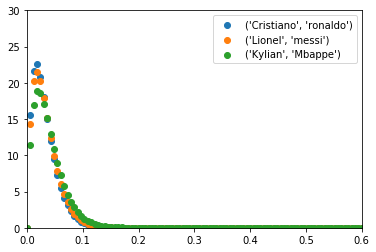

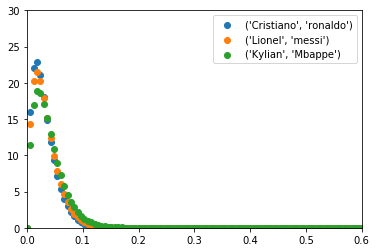

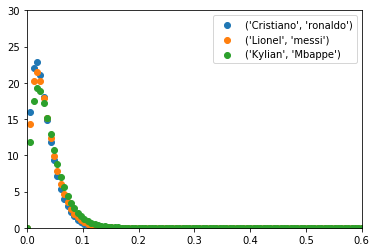

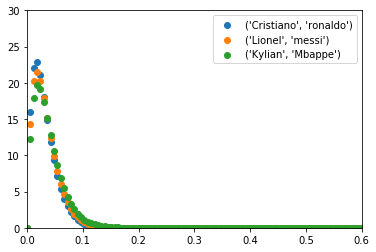

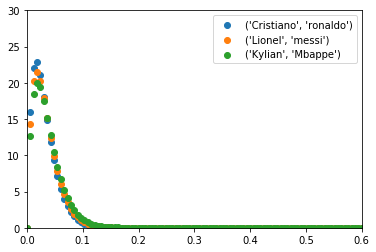

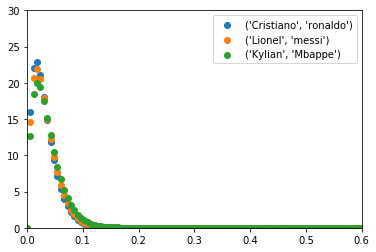

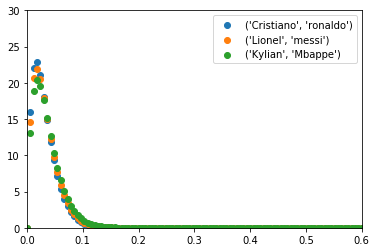

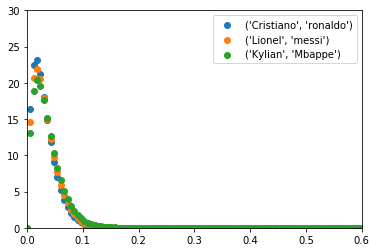

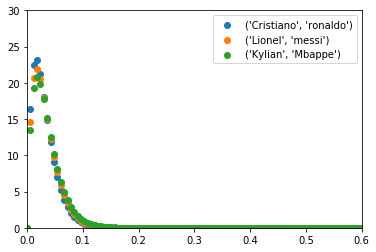

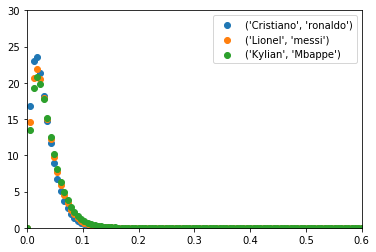

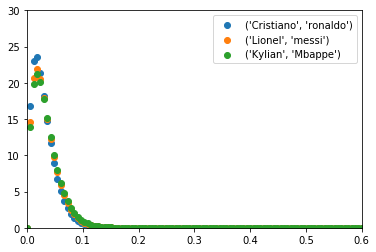

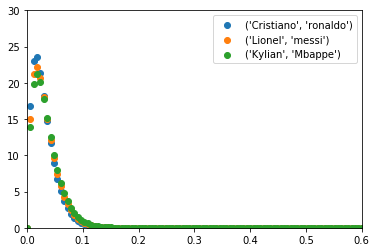

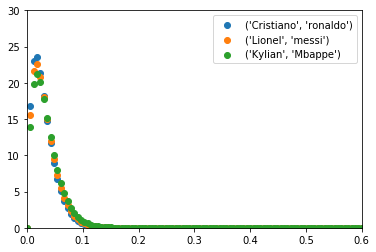

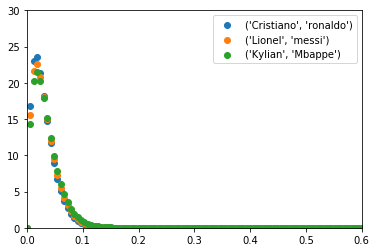

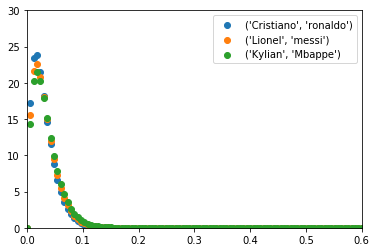

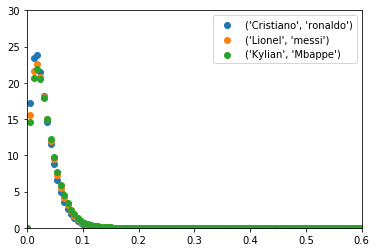

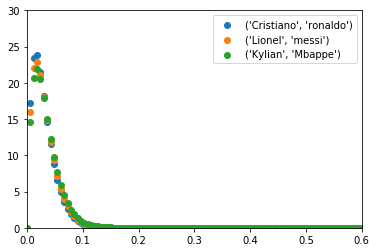

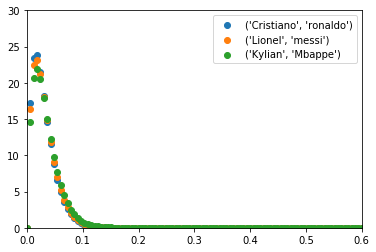

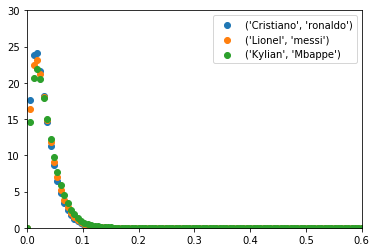

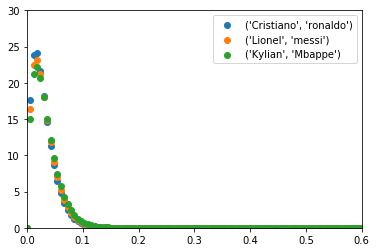

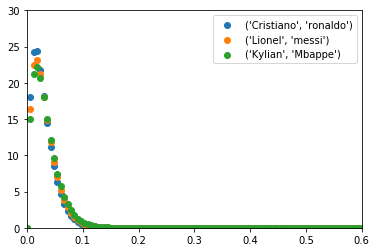

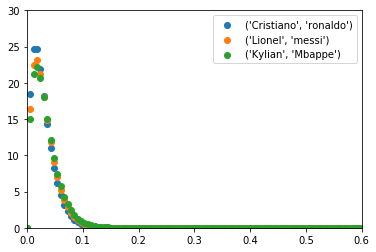

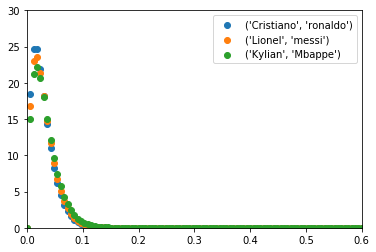

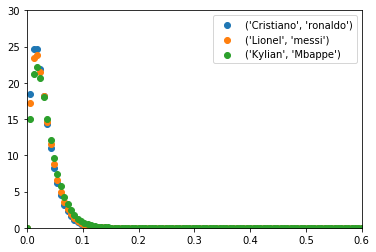

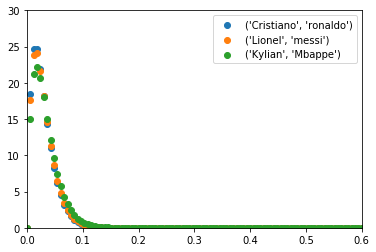

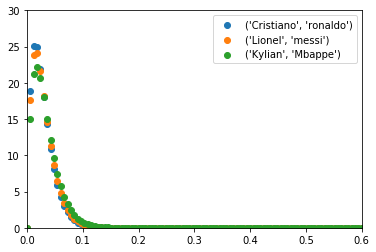

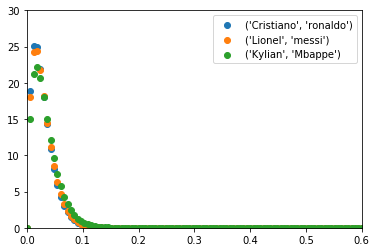

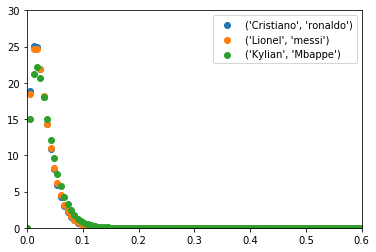

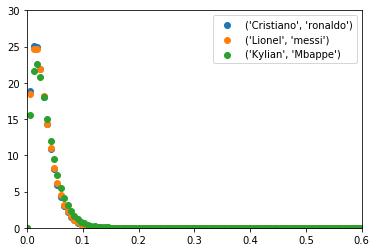

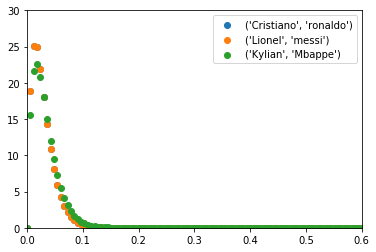

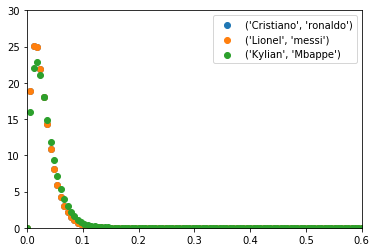

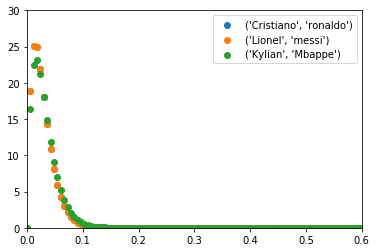

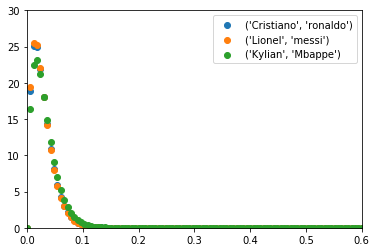

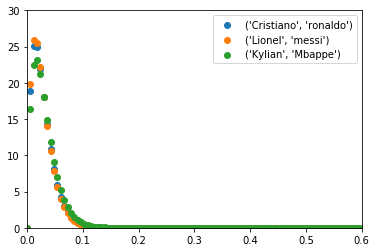

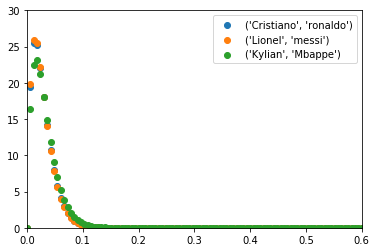

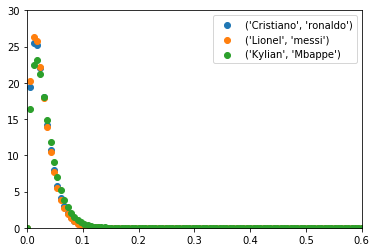

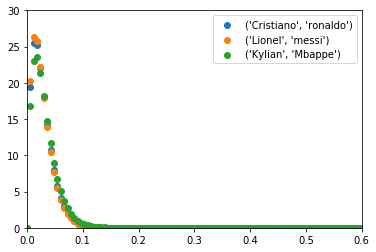

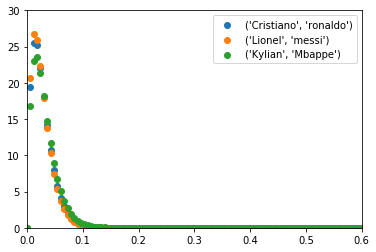

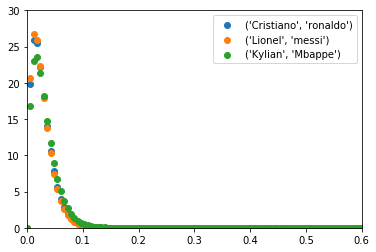

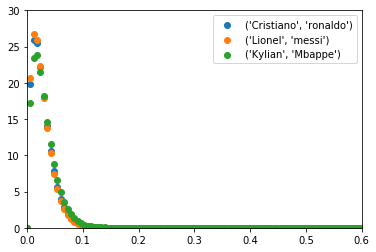

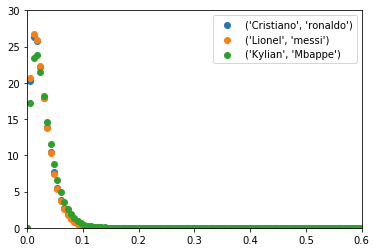

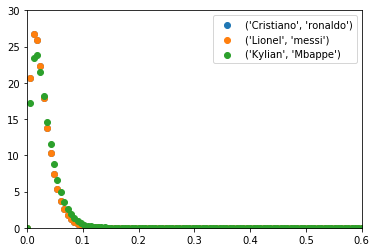

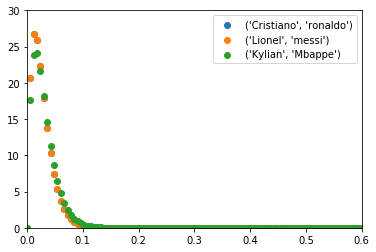

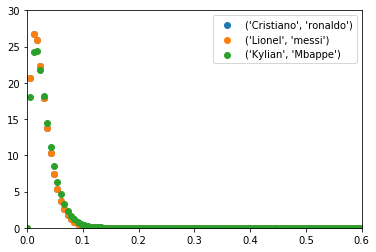

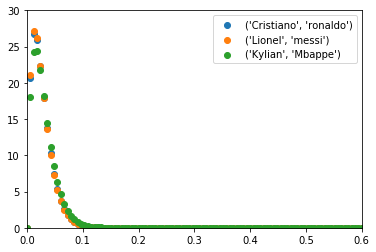

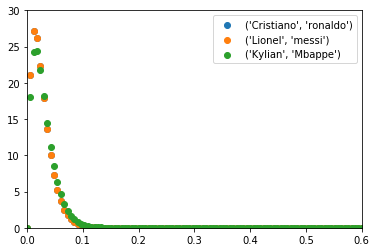

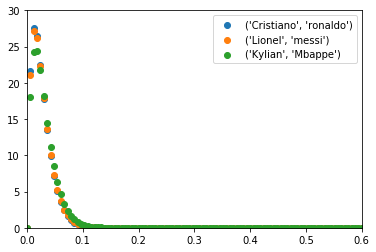

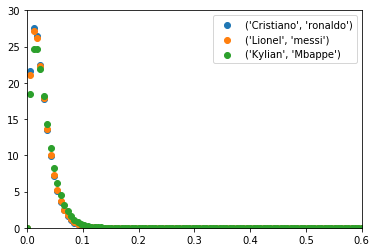

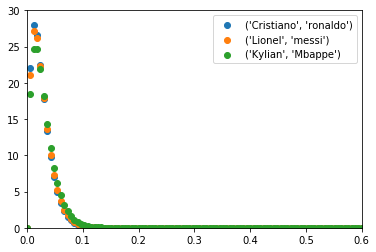

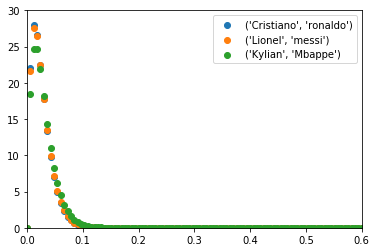

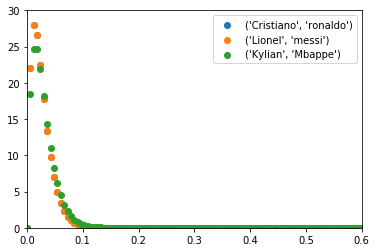

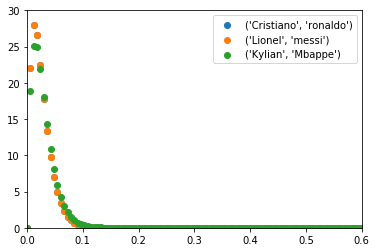

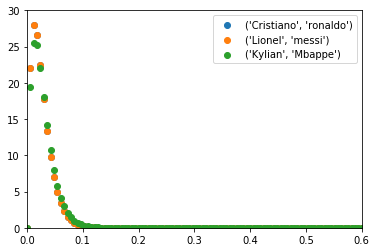

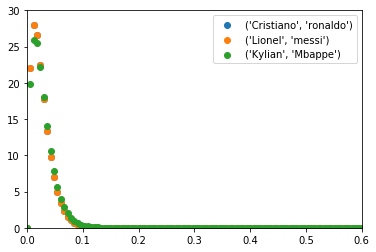

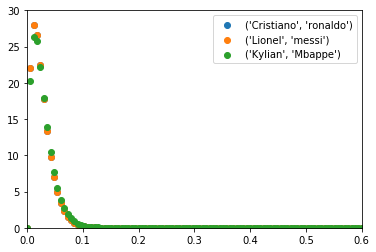

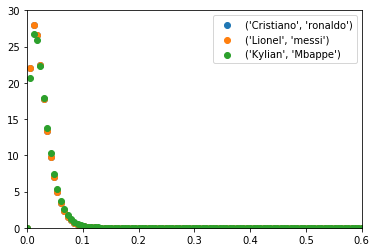

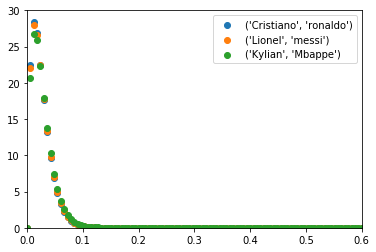

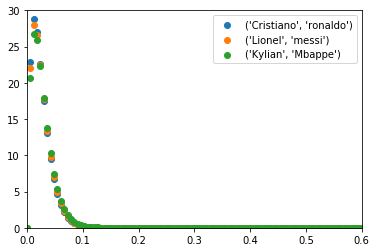

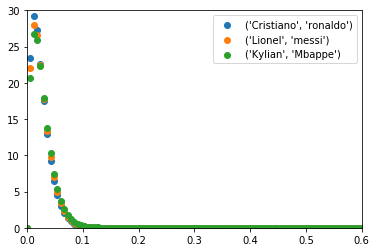

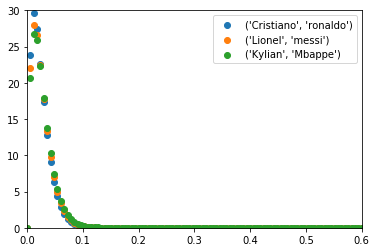

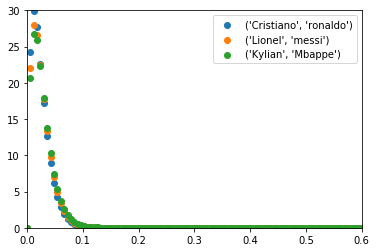

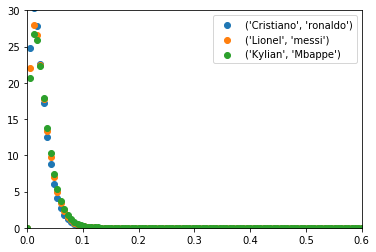

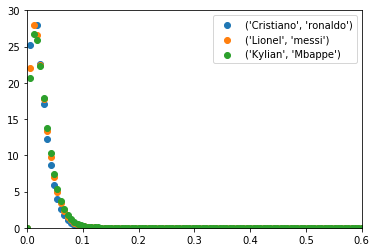

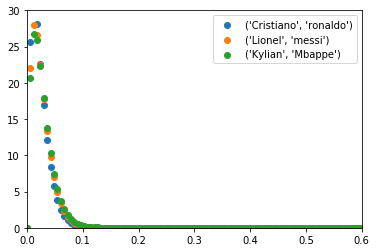

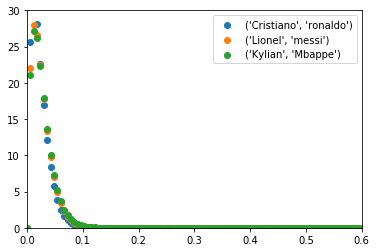

In [11]:
bandit = BanditRPM([('Lionel','messi'),('Cristiano','ronaldo'),('Kylian', 'Mbappe')],(2,5))
swh = StreamWatcherHandler(bandit)
stream = tweepy.Stream(auth, swh)
try:
    stream.filter(track=['football', 'best'])
except KeyboardInterrupt:
    sys.exit(0)
    

62


Text(0,0.5,'Reward')

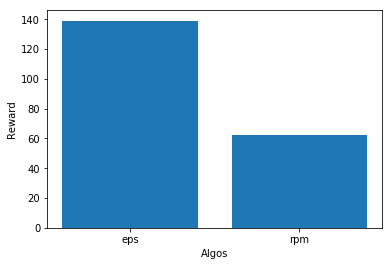

In [24]:
print(tr)
tweetalgo = ['eps','rpm']
score = [tr1,tr]
plt.bar(tweetalgo,score)
plt.xlabel("Algos")
plt.ylabel("Reward")

Running advertisment simulation with N_ads = 10 and agent epsilon = 0.1
[Experiment 1/100]
  N_episodes = 10000
  bandit choice history = [1 4 4 ..., 4 4 4]
  reward history = [0 1 0 ..., 1 1 0]
  average reward = 0

[Experiment 2/100]
  N_episodes = 10000
  bandit choice history = [ 9  1  5 ...,  4 10  4]
  reward history = [0 0 0 ..., 1 0 0]
  average reward = 0

[Experiment 3/100]
  N_episodes = 10000
  bandit choice history = [4 4 4 ..., 4 4 4]
  reward history = [1 1 1 ..., 1 1 1]
  average reward = 0

[Experiment 4/100]
  N_episodes = 10000
  bandit choice history = [1 1 3 ..., 4 4 4]
  reward history = [0 0 1 ..., 1 1 1]
  average reward = 0

[Experiment 5/100]
  N_episodes = 10000
  bandit choice history = [3 3 3 ..., 4 4 4]
  reward history = [1 1 0 ..., 1 1 1]
  average reward = 0

[Experiment 6/100]
  N_episodes = 10000
  bandit choice history = [4 4 4 ..., 4 4 4]
  reward history = [1 1 1 ..., 1 1 1]
  average reward = 0

[Experiment 7/100]
  N_episodes = 10000
  bandit cho

[Experiment 57/100]
  N_episodes = 10000
  bandit choice history = [1 9 9 ..., 4 4 4]
  reward history = [0 1 1 ..., 0 1 1]
  average reward = 0

[Experiment 58/100]
  N_episodes = 10000
  bandit choice history = [ 1 10 10 ...,  4  7  4]
  reward history = [0 1 1 ..., 1 1 0]
  average reward = 0

[Experiment 59/100]
  N_episodes = 10000
  bandit choice history = [10  9  9 ...,  4  4  4]
  reward history = [0 1 1 ..., 1 1 1]
  average reward = 0

[Experiment 60/100]
  N_episodes = 10000
  bandit choice history = [10  4  4 ...,  4  4  4]
  reward history = [0 1 0 ..., 1 1 1]
  average reward = 0

[Experiment 61/100]
  N_episodes = 10000
  bandit choice history = [7 7 7 ..., 9 9 9]
  reward history = [0 1 1 ..., 0 1 1]
  average reward = 0

[Experiment 62/100]
  N_episodes = 10000
  bandit choice history = [ 3 10 10 ...,  4  4  5]
  reward history = [0 1 1 ..., 1 1 0]
  average reward = 0

[Experiment 63/100]
  N_episodes = 10000
  bandit choice history = [3 3 3 ..., 4 4 4]
  reward histo

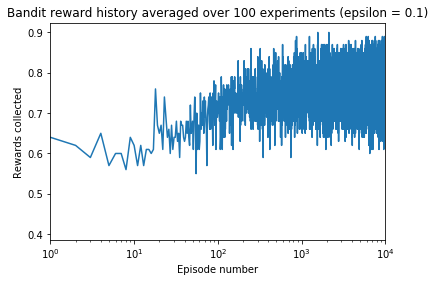

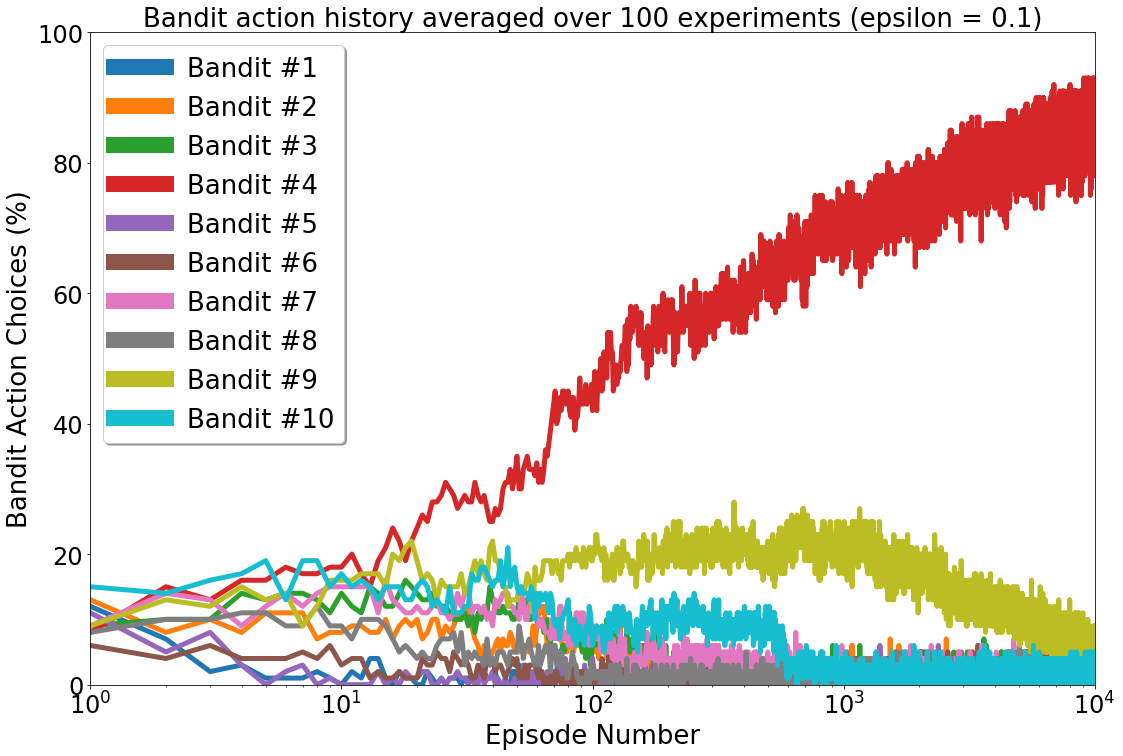

In [25]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  3 08:14:18 2019

@author: RISHABH BAID
"""

import numpy as np
import matplotlib.pyplot as plt

def main():
    # =========================
    # Settings
    # =========================
    bandit_probs = [0.10, 0.50, 0.60, 0.80, 0.10,
                    0.25, 0.60, 0.45, 0.75, 0.65]  # bandit probabilities of success
    N_experiments = 100  # number of experiments to perform
    N_episodes = 10000  # number of episodes per experiment
    epsilon = 0.1  # probability of random exploration (fraction)
    save_fig = True  # if false -> plot, if true save as file in same directory

    # =========================
    # Define Bandit and Agent class
    # =========================
    class Bandit:

        def __init__(self, bandit_probs):
            self.N = len(bandit_probs)  # number of bandits
            self.prob = bandit_probs  # success probabilities for each bandit

        # Get reward (1 for success, 0 for failure)
        def get_reward(self, action):
            rand = np.random.random()  # [0.0,1.0)
            reward = 1 if (rand < self.prob[action]) else 0
            return reward

    class Agent:

        def __init__(self, bandit, epsilon):
            self.epsilon = epsilon
            self.k = np.zeros(bandit.N, dtype=np.int)  # number of times action was chosen
            self.Q = np.zeros(bandit.N, dtype=np.float)  # estimated value

        # Update Q action-value using:
        # Q(a) <- Q(a) + 1/(k+1) * (r(a) - Q(a))
        def update_Q(self, action, reward):
            self.k[action] += 1  # update action counter k -> k+1
            self.Q[action] += (1./self.k[action]) * (reward - self.Q[action])

        # Choose action using an epsilon-greedy agent
        def get_action(self, bandit, force_explore=False):
            rand = np.random.random()  # [0.0,1.0)
            if (rand < self.epsilon) or force_explore:
                action_explore = np.random.randint(bandit.N)  # explore random bandit
                return action_explore
            else:
                #action_greedy = np.argmax(self.Q)  # exploit best current bandit
                action_greedy = np.random.choice(np.flatnonzero(self.Q == self.Q.max()))
                return action_greedy

    # =========================
    # Define an experiment
    # =========================
    def experiment(agent, bandit, N_episodes):
        action_history = []
        reward_history = []
        for episode in range(N_episodes):
            # Choose action from agent (from current Q estimate)
            action = agent.get_action(bandit)
            # Pick up reward from bandit for chosen action
            reward = bandit.get_reward(action)
            # Update Q action-value estimates
            agent.update_Q(action, reward)
            # Append to history
            action_history.append(action)
            reward_history.append(reward)
        return (np.array(action_history), np.array(reward_history))

    # =========================
    #
    # Start multi-armed bandit simulation
    #
    # =========================
    N_bandits = len(bandit_probs)
    print("Running advertisment simulation with N_ads = {} and agent epsilon = {}".format(N_bandits, epsilon))
    reward_history_avg = np.zeros(N_episodes)  # reward history experiment-averaged
    action_history_sum = np.zeros((N_episodes, N_bandits))  # sum action history
    for i in range(N_experiments):
        bandit = Bandit(bandit_probs)  # initialize bandits
        agent = Agent(bandit, epsilon)  # initialize agent
        (action_history, reward_history) = experiment(agent, bandit, N_episodes)  # perform experiment

        if (i + 1) % (N_experiments / 100) == 0:
            print("[Experiment {}/{}]".format(i + 1, N_experiments))
            print("  N_episodes = {}".format(N_episodes))
            print("  bandit choice history = {}".format(
                action_history + 1))
            print("  reward history = {}".format(
                reward_history))
            print("  average reward = {}".format(np.sum(reward_history) / len(reward_history)))
            print("")
        # Sum up experiment reward (later to be divided to represent an average)
        reward_history_avg += reward_history
        # Sum up action history
        for j, (a) in enumerate(action_history):
            action_history_sum[j][a] += 1

    reward_history_avg /= np.float(N_experiments)
    print("reward history avg = {}".format(reward_history_avg))

    # =========================
    # Plot reward history results
    # =========================
    plt.plot(reward_history_avg)
    plt.xlabel("Episode number")
    plt.ylabel("Rewards collected".format(N_experiments))
    plt.title("Bandit reward history averaged over {} experiments (epsilon = {})".format(N_experiments, epsilon))
    ax = plt.gca()
    ax.set_xscale("log", nonposx='clip')
    plt.xlim([1, N_episodes])
#    if save_fig:
#        output_file = "output/rewards.png"
#        plt.savefig(output_file, bbox_inches="tight")
#    else:
    plt.show()

    # =========================
    # Plot action history results
    # =========================
    plt.figure(figsize=(18, 12))
    for i in range(N_bandits):
        action_history_sum_plot = 100 * action_history_sum[:,i] / N_experiments
        plt.plot(list(np.array(range(len(action_history_sum_plot)))+1),
                 action_history_sum_plot,
                 linewidth=5.0,
                 label="Bandit #{}".format(i+1))
    plt.title("Bandit action history averaged over {} experiments (epsilon = {})".format(N_experiments, epsilon), fontsize=26)
    plt.xlabel("Episode Number", fontsize=26)
    plt.ylabel("Bandit Action Choices (%)", fontsize=26)
    leg = plt.legend(loc='upper left', shadow=True, fontsize=26)
    ax = plt.gca()
    ax.set_xscale("log", nonposx='clip')
    plt.xlim([1, N_episodes])
    plt.ylim([0, 100])
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(16.0)
#    if save_fig:
#        output_file = "output/actions.png"
#        plt.savefig(output_file, bbox_inches="tight")
#    else:
    plt.show()

# Driver
if __name__ == "__main__":
    main()